In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

from IPython.display import display, HTML

#### Measuring Metric for Regression
https://scikit-learn.org/stable/modules/model_evaluation.html

In [5]:
#help(kaggle.api.dataset_download_files)

In [6]:
# Modify this path according to your system path : Where you kept ur python notebook file
# MySelf
data = "/Users/sanjayk/Dropbox/Work/Careerera/Final/ML/data/"
#kaggle.api.dataset_download_files("jemishdonda/headbrain", unzip=True,path=data)  

In [ ]:
#downloading the headbrain.csv file
kaggle.api.authenticate()
kaggle.api.dataset_download_files("saarthaksangam/headbrain", unzip=True)   

1. Read the dataset from csv/mysql
2. Display the Size of the dataset
3. Check for Null/Value
4. Put mean with Missing value
5. Check again if any miss value of there
6. if any categorical/nomial variable, we need label encoder
7. Divide the dataset into x_train,y_train,x_test,y_test (training/testing : 80:20,75:25,60:40)

7.  Classication / Regression :


In [9]:
df = pd.read_csv(data + 'headbrain.csv')
display(HTML(df.head(10).to_html()))

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [10]:
# default : pearson Correlation metric amoung all features/ columns
df.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


In [11]:
print(f'Size of the dataset : {df.shape[0]}')

Size of the dataset : 237


In [12]:
#help(pd.DataFrame.corr)

In [13]:
X = df[['Head Size(cm^3)']].values           # X : Independent Variable (1-n : 1 Minimum)
y = df[['Brain Weight(grams)']].values       # y = Dependent Variable        

Text(0, 0.5, 'Brain Weight')

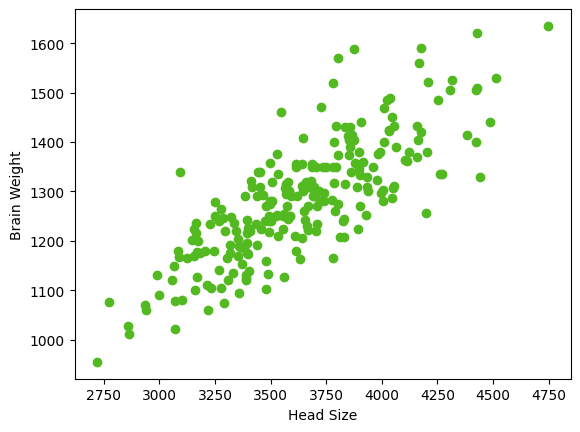

In [14]:
plt.scatter(X,y,color='#52b920')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

#### Least Square Fit Method:

            Summation (x-xmean) (y-ymean) 
    m  =   ------------------------------
             Summation (x-xmean)


    c = yMean - m * xmean

In [15]:
ymean = np.mean(y)
xmean = np.mean(X)
print(f'XMean : {xmean:0.3f}')
print(f'YMean : {ymean:0.3f}')

XMean : 3633.992
YMean : 1282.873


In [16]:
numerator = 0.0
denominator = 0.0

for index in range(len(y)):
    denominator +=  (X[index]-xmean)**2     # Variance
    numerator += (X[index]-xmean) * (y[index]-ymean) # Co-variance
m = numerator / denominator
c = ymean - m * xmean

print(f'Slope of the Line : {m[0]:0.3f}')
print(f'Intercept of the line : {c[0]:0.3f}')

Slope of the Line : 0.263
Intercept of the line : 325.573



Standard deviation and Variance :

Variance = Summation(X - Xmean)**2
Standard deviation = SQRT(Summation((X - Xmean)**2))  = SQRT(Variance)

Co-Variance = Summation ((X-Xmean) * (Y-Ymean))